In [278]:

# coding: utf-8


from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [290]:
# irisのデータセット
'''
iris = datasets.load_iris()

#p.10に書いてある

X = iris.data[:, 2: 4]
y = iris.target


# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
'''

# 自作でデータ作る
# 正規分布で作る
# mean座標, var, sizeの配列
dataNum = 100
group1 = [2., 5., 0.4, dataNum]
group2 = [4., 1., 1.1, dataNum]


group1axis1Dist = np.random.normal(group1[0],  group1[2], group1[3]);
group1axis2Dist = np.random.normal(group1[1],  group1[2], group1[3]);
group2axis1Dist = np.random.normal(group2[0],  group2[2], group2[3]);
group2axis2Dist = np.random.normal(group2[1],  group2[2], group2[3]);

# 特徴量１、２のベクトル
axis1_train = np.hstack((group1axis1Dist, group2axis1Dist));
axis2_train = np.hstack((group1axis2Dist, group2axis2Dist));

label_train = np.hstack((np.ones(group1[3]), np.zeros(group2[3]) ))

# ただの確認
#plt.scatter(group1axis1Dist, group1axis2Dist, color='red');
#plt.scatter(group2axis1Dist, group2axis2Dist, color = 'blue');
#plt.show();

In [280]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [281]:
class LogisticRegression(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            #output[output<1.e-6] +=1.e-3
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
            print(i)
            print(self.w_)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. +np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        


(200, 2)
(200,)
0
[ 0.06070204 -5.04570798 10.50309237]
1
[-0.89838859 -8.32148715  8.39124467]
2
[-0.9792413  -8.4901742   8.20498233]
3
[-1.03828285 -8.60004416  8.0798868 ]
4
[-1.08523061 -8.68098691  7.98582806]
5
[-1.12455791 -8.74537242  7.90995414]
6
[-1.1585112  -8.79900192  7.84614423]
7
[-1.188374   -8.844962    7.79109726]
8
[-1.21496975 -8.88508634  7.74282577]
9
[-1.23887393 -8.92056118  7.70002817]
10
[-1.26051296 -8.95220351  7.661799  ]
11
[-1.2802154  -8.98060208  7.62748094]
12
[-1.29824143 -9.00619562  7.59658197]
13
[-1.31480122 -9.02931984  7.56872468]
14
[-1.33006747 -9.05023783  7.5436129 ]
15
[-1.34418428 -9.06916083  7.52100835]
16
[-1.35727384 -9.08626319  7.50071353]
17
[-1.36944138 -9.10169331  7.48255899]
18
[-1.38077902 -9.11558169  7.46639378]
19
[-1.39136865 -9.12804686  7.45207853]
20
[-1.40128407 -9.13919941  7.43948069]
21
[-1.41059252 -9.14914461  7.42847159]
22
[-1.41935571 -9.15798386  7.41892504]
23
[-1.42763051 -9.16581522  7.41071701]
24
[-1.435

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


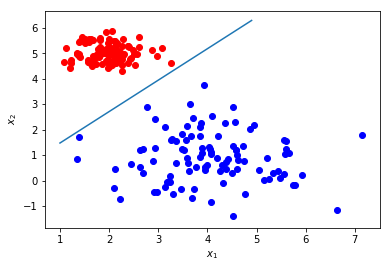

In [289]:
'''
#iris使うときは使えばいい
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
print(X_train_01_subset.shape)
print(y_train_01_subset.shape)
'''

# 特徴量

X_train_01_subset = np.vstack((axis1_train, axis2_train)).T
y_train_01_subset = label_train.reshape((-1))
print(X_train_01_subset.shape)
print(y_train_01_subset.shape)

#print(y_train_01_subset)
lrgd = LogisticRegression(eta=0.05, n_iter=100, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

print(lrgd.w_)
w0, w1,w2 = lrgd.w_
x1data = np.arange(1., 5., 0.1)
x2data = -w1/w2*x1data-w0/w2
plt.plot(x1data, x2data)
plt.scatter(group1axis1Dist, group1axis2Dist, color='red')
plt.scatter(group2axis1Dist, group2axis2Dist, color = 'blue')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("plot100.png")
plt.show()


# plot_decision_regions(X=X_train_01_subset, 
#                       y=y_train_01_subset,
#                       classifier=lrgd)

# plt.xlabel('petal length [standardized]')
# plt.ylabel('petal width [standardized]')
# plt.legend(loc='upper left')

# plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
# plt.show()



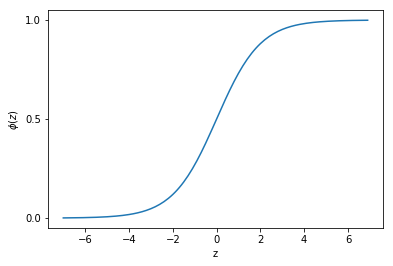

In [283]:
x1 = np.arange(-7, 7, 0.1)
y1= 1/(1.+np.exp(-x))
y2=0.1*x+0.5
plt.plot(x1,y1)
plt.yticks([0., 0.5, 1.])
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
#plt.plot(x,y2)
plt.savefig("test.png")
plt.show()